In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import auc, roc_auc_score

In [25]:
preds = pd.read_csv('top_predictors_window5y_age30.csv')
preds.head()

,Unnamed: 0,pred,description,Gini
0,1,race,NaN,14.742317
1,2,MARITAL_STATUS,NaN,14.061233
2,3,dx_ICD9.296.7,"Bipolar affective disorder, unspecified",8.977609
3,4,dx_ICD10.Z00.00,Encounter for general adult medical examinatio...,7.877645
4,5,public_payer,NaN,7.657286


In [3]:
list(preds[preds['pred']=='dx_ICD9.296.7']['description'])[0]

'Bipolar affective disorder, unspecified'

In [4]:
df_cases = pd.read_csv('cases.csv')
df_cases = df_cases.rename(columns={'Unnamed: 0': 'patient_id'})

In [25]:
df_all = pd.read_csv('df_with_race_all_ages.csv')

In [ ]:
training = pd.read_csv('training.csv')

In [37]:
len(training)

126226

In [6]:
print('Num cases:', len(df_cases))

Num cases: 5267


In [7]:
df_cases

,patient_id,subject_num,birth_date,table1_narrow_count,table1_narrow_start,table1_narrow_start_age,table1_broad_count,table1_broad_start,table1_broad_start_age,table1_hybrid_count,...,table2_count,table2_start,table2_start_age,table3_count,table3_start,table1_count,table1_start,table1_start_age,index_date,index_age
0,184,10159284,1986-04-26,1,2007-05-12,21.1,2,2007-05-12,21.1,2,...,0,NaN,NaN,1,2007-05-12,2,2007-05-12,21.1,2007-05-12,21.1
1,207,11479020,1987-08-31,6,2008-10-12,21.1,8,2006-02-06,18.4,7,...,0,NaN,NaN,0,NaN,8,2006-02-06,18.4,2006-02-06,18.4
2,239,12160476,1987-08-20,15,2019-12-09,32.3,15,2019-12-09,32.3,15,...,0,NaN,NaN,0,NaN,15,2019-12-09,32.3,2019-12-09,32.3
3,337,12061753,1986-05-10,9,2014-08-31,28.3,9,2014-08-31,28.3,9,...,0,NaN,NaN,5,2014-08-31,9,2014-08-31,28.3,2014-08-31,28.3
4,436,12752558,2001-08-14,24,2020-02-28,18.6,24,2020-02-28,18.6,24,...,0,NaN,NaN,0,NaN,24,2020-02-28,18.6,2020-02-28,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,1328341,12419659,1992-09-28,3,2019-02-21,26.4,3,2019-02-21,26.4,3,...,0,NaN,NaN,0,NaN,3,2019-02-21,26.4,2019-02-21,26.4
5263,1328521,10428995,2002-09-02,2,2020-05-17,17.7,10,2020-04-30,17.7,10,...,0,NaN,NaN,0,NaN,10,2020-04-30,17.7,2020-04-30,17.7
5264,1328731,12456174,1993-06-11,2,2018-10-23,25.4,2,2018-10-23,25.4,2,...,0,NaN,NaN,0,NaN,2,2018-10-23,25.4,2018-10-23,25.4
5265,1329127,11048025,2003-02-23,2,2019-01-19,15.9,2,2019-01-19,15.9,2,...,0,NaN,NaN,0,NaN,2,2019-01-19,15.9,2019-01-19,15.9


In [9]:
# 15-20
len(df_cases[df_cases['table1_narrow_start_age'].apply(lambda x: x >= 15 and x < 20)])

733

In [10]:
# 20-25
len(df_cases[df_cases['table1_narrow_start_age'].apply(lambda x: x >= 20 and x < 25)])

1316

In [11]:
# 25-30
len(df_cases[df_cases['table1_narrow_start_age'].apply(lambda x: x >= 25 and x < 30)])

1360

In [12]:
# 30-35
len(df_cases[df_cases['table1_narrow_start_age'].apply(lambda x: x >= 30 and x < 35)])

1394

In [13]:
733+1316+1360+1394

4803

In [16]:
1316/4803

0.27399541952946077

# Prevalence for Study Population

In [23]:
race_list = ['White', 'Black', 'Asian', 'Other', 'Unknown']

for race in race_list:
    total_per_race = df_all[df_all['race']==race]
    num_race = len(total_per_race)
    num_cases_per_race = len(total_per_race[total_per_race['isCase']==1])
    
    print(f'Total study population {race}: ', num_race)
    print(f'Cases study population {race}: ', num_cases_per_race)
    print(f'Prevalence {race}: ', round((num_cases_per_race/float(num_race))*100, 2), '%')
    print()

Total study population White:  62839
Cases study population White:  935
Prevalence White:  1.49 %

Total study population Black:  9052
Cases study population Black:  236
Prevalence Black:  2.61 %

Total study population Asian:  3721
Cases study population Asian:  51
Prevalence Asian:  1.37 %

Total study population Other:  9004
Cases study population Other:  145
Prevalence Other:  1.61 %

Total study population Unknown:  6975
Cases study population Unknown:  130
Prevalence Unknown:  1.86 %



# Race Breakdown of Cases

In [33]:
df_race = pd.read_csv('./No_Race_Data/demographics.csv')
df_race

,subject_num,gender,sbirth_date,race,veteran,marital_status,ethnicity,deceased,sdeath_date,biobank_genotyped,current_zip3,currentzip_medianincome_2010,visit_count,fact_count,icd_count,icd_first_sdate,cpt_count,cpt_first_sdate,public_payer,notes_ct
0,10985687,M,1969-06-16,Black,U,Married,Non-Hispanic,N,NaN,NaN,020,69340.0,49.0,547.0,231.0,05/03/1998,261.0,05/03/1998,0,94.0
1,11664128,F,1966-10-02,White,U,Single,Non-Hispanic,Y,09/20/2008,NaN,020,85131.0,91.0,710.0,391.0,09/08/1999,312.0,09/08/1999,1,145.0
2,12095563,F,1970-08-10,Unknown,N,Single,Hispanic,N,NaN,NaN,021,30282.0,304.0,1615.0,693.0,01/17/1998,745.0,01/17/1998,1,353.0
3,12021239,M,1968-02-22,Black,N,Single,Non-Hispanic,N,NaN,NaN,019,38107.0,18.0,225.0,99.0,07/27/1998,117.0,07/27/1998,1,37.0
4,10341333,F,1968-01-18,White,N,Married,Non-Hispanic,N,NaN,NaN,023,62408.0,392.0,2024.0,1056.0,01/08/1998,762.0,01/08/1998,0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329191,12470877,M,1986-06-08,Asian,N,Married,Non-Hispanic,N,NaN,NaN,024,128598.0,57.0,197.0,121.0,02/14/2017,48.0,10/01/2017,0,37.0
1329192,11706242,M,2001-08-05,Black,U,Single,Non-Hispanic,N,NaN,NaN,021,62945.0,10.0,31.0,20.0,08/13/2015,6.0,01/21/2016,1,15.0
1329193,11181783,F,1996-12-13,White,N,Single,Non-Hispanic,N,NaN,NaN,020,164583.0,27.0,106.0,35.0,04/14/2001,40.0,04/14/2001,0,8.0
1329194,12796490,M,1966-04-14,Black,N,Divorced,Non-Hispanic,N,NaN,NaN,021,40344.0,8.0,118.0,36.0,08/09/2015,44.0,08/09/2015,1,26.0


In [39]:
# list of race
race_list = list(set(list(df_race['race'])))
race_list

# list of ages
age_list = [15, 20, 25, 30]
# index_age

### General race breakdown

In [7]:
cases_per_race_dict = {} # key: race; value: number of cases per race

for race in race_list:
    spec_race_df = df_race[df_race['race']==race]
    num_patients_per_race = len(spec_race_df)
    list_of_patients_per_race = list(spec_race_df['subject_num'])
    num_cases_per_race = len(df_cases[df_cases['subject_num'].apply(lambda x: int(x) in list_of_patients_per_race)])
    
    cases_per_race_dict[race] = num_cases_per_race
    
    print(f'Race: {race}')
    print(f'Total number of people of that race: {num_patients_per_race}')
    print(f'Number of cases of that race: {num_cases_per_race}')
    print(f'Cases : Total percent of that race: {round((num_cases_per_race / float(num_patients_per_race)) * 100, 3)}%')
    print()

Race: Asian
Total number of people of that race: 86148
Number of cases of that race: 181
Cases : Total percent of that race: 0.21%

Race: Other
Total number of people of that race: 135170
Number of cases of that race: 494
Cases : Total percent of that race: 0.365%

Race: Unknown
Total number of people of that race: 76041
Number of cases of that race: 461
Cases : Total percent of that race: 0.606%

Race: White
Total number of people of that race: 925894
Number of cases of that race: 3329
Cases : Total percent of that race: 0.36%

Race: Black
Total number of people of that race: 105943
Number of cases of that race: 802
Cases : Total percent of that race: 0.757%



In [8]:
df_race

,subject_num,gender,sbirth_date,race,veteran,marital_status,ethnicity,deceased,sdeath_date,biobank_genotyped,current_zip3,currentzip_medianincome_2010,visit_count,fact_count,icd_count,icd_first_sdate,cpt_count,cpt_first_sdate,public_payer,notes_ct
0,10985687,M,1969-06-16,Black,U,Married,Non-Hispanic,N,NaN,NaN,020,69340.0,49.0,547.0,231.0,05/03/1998,261.0,05/03/1998,0,94.0
1,11664128,F,1966-10-02,White,U,Single,Non-Hispanic,Y,09/20/2008,NaN,020,85131.0,91.0,710.0,391.0,09/08/1999,312.0,09/08/1999,1,145.0
2,12095563,F,1970-08-10,Unknown,N,Single,Hispanic,N,NaN,NaN,021,30282.0,304.0,1615.0,693.0,01/17/1998,745.0,01/17/1998,1,353.0
3,12021239,M,1968-02-22,Black,N,Single,Non-Hispanic,N,NaN,NaN,019,38107.0,18.0,225.0,99.0,07/27/1998,117.0,07/27/1998,1,37.0
4,10341333,F,1968-01-18,White,N,Married,Non-Hispanic,N,NaN,NaN,023,62408.0,392.0,2024.0,1056.0,01/08/1998,762.0,01/08/1998,0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329191,12470877,M,1986-06-08,Asian,N,Married,Non-Hispanic,N,NaN,NaN,024,128598.0,57.0,197.0,121.0,02/14/2017,48.0,10/01/2017,0,37.0
1329192,11706242,M,2001-08-05,Black,U,Single,Non-Hispanic,N,NaN,NaN,021,62945.0,10.0,31.0,20.0,08/13/2015,6.0,01/21/2016,1,15.0
1329193,11181783,F,1996-12-13,White,N,Single,Non-Hispanic,N,NaN,NaN,020,164583.0,27.0,106.0,35.0,04/14/2001,40.0,04/14/2001,0,8.0
1329194,12796490,M,1966-04-14,Black,N,Divorced,Non-Hispanic,N,NaN,NaN,021,40344.0,8.0,118.0,36.0,08/09/2015,44.0,08/09/2015,1,26.0


### Race breakdown by age

In [9]:
for race in race_list:
    cases_per_age_dict = {} # key: age; value: num_cases_per_age
    
    spec_race_df = df_race[df_race['race']==race]
    num_patients_per_race = len(spec_race_df)
    list_of_patients_per_race = list(spec_race_df['subject_num'])
    # cases_per_race = df_cases[df_cases['subject_num'].apply(lambda x: int(x) in list_of_patients_per_race)]
    
    for age in age_list:
        num_cases_per_age = len(df_cases[(df_cases['subject_num'].apply(lambda x: int(x) in list_of_patients_per_race)) & 
                                     (df_cases['index_age'] >= age) & (df_cases['index_age'] < age + 5)])
        cases_per_age_dict[age] = num_cases_per_age
    
    print(f'Race: {race}')
    print(f'Total number of people of that race: {num_patients_per_race}')
    
    for key, value in cases_per_age_dict.items():
        num_patients_per_race_per_age = defaultdict(int)
        for patient in list_of_patients_per_race:
            num_patients_per_race_per_age[key] += 1
        print(f'Total patients between ages {key} and {key+5}: {num_patients_per_race_per_age}')
        print(f'Cases between ages {key} and {key+5}: {value}')
        print(f'Cases in age group / Total Cases: {round((float(value) / cases_per_race_dict[race]) * 100, 3)}%')
    
    # print(f'Number of cases of that race: {num_cases_per_race}')
    # print(f'Cases : Total percent of that race: {round((num_cases_per_race / float(num_patients_per_race)) * 100, 3)}%')
    print()

Race: Asian
Total number of people of that race: 86148


KeyError: 'index_age'

# Sensitivity Percentages: Function Defs

In [13]:
def get_age_bucket_df(model_pred_csv, age_threshold):
    '''
    model_pred_csv: csv file of model predictoins
    age_threshold: i.e. for 15-20 it would be 15; for 20-25 it would be 20, etc.
    '''
    rf_preds = pd.read_csv(model_pred_csv)
    # rf_preds = rf_preds.rename(columns={'Unnamed: 0': 'patient_id'})
    rf_preds = rf_preds.rename(columns={rf_preds.columns[0]: "patient_id"})
    del rf_preds['0']

    # csv of just controls
    rf_controls = rf_preds[rf_preds['isCase'] == 0]
    
    # csv of just cases
    rf_cases = rf_preds[rf_preds['isCase'] == 1]
    rf_cases = rf_cases.sort_values(by='1', ascending=False)
    
    df_within_1_year = rf_cases[(rf_cases['age_at_index']-age_threshold > 0) & (rf_cases['age_at_index']-age_threshold < 1)]
    df_1_to_2_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 1) & (rf_cases['age_at_index']-age_threshold < 2)]
    df_2_to_3_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 2) & (rf_cases['age_at_index']-age_threshold < 3)]
    df_3_to_4_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 3) & (rf_cases['age_at_index']-age_threshold < 4)]
    df_4_to_5_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 4) & (rf_cases['age_at_index']-age_threshold < 5)]
    
    print('Within 1 year: ', len(df_within_1_year))
    print('1 to 2 years: ', len(df_1_to_2_years))
    print('2 to 3 years: ', len(df_2_to_3_years))
    print('3 to 4 years: ', len(df_3_to_4_years))
    print('4 to 5 years: ', len(df_4_to_5_years))

    total_cases = len(df_within_1_year)+len(df_1_to_2_years)+len(df_2_to_3_years)+len(df_3_to_4_years)+len(df_4_to_5_years)
    total_cases_df = pd.concat([df_within_1_year, df_1_to_2_years, df_2_to_3_years, df_3_to_4_years, df_4_to_5_years], axis=0, join='outer')
    print('Total RF testing cases: ', total_cases)
    
    # add cases that meet case def outside of range to rf_controls
    controls_add_on = rf_cases[rf_cases['patient_id'].apply(lambda x: x not in list(total_cases_df['patient_id']))]
    rf_controls = pd.concat([rf_controls, controls_add_on], axis=0, join='outer')
    rf_controls = rf_controls.sort_values(by='1', ascending=False)
    
    return total_cases_df, rf_preds, rf_cases, rf_controls, total_cases, df_within_1_year, df_1_to_2_years, df_2_to_3_years, df_3_to_4_years, df_4_to_5_years

In [8]:
def get_sensitivity(rf_controls, rf_cases, total_cases):
    # get top 10% of rf_controls and the threshold
    top_10_percent_row_count = int(len(rf_controls) * 0.1)
    top_10_percent_rows = rf_controls.head(top_10_percent_row_count)

    # get top 5% of rf_controls and the threshold
    top_5_percent_row_count = int(len(rf_controls) * 0.05)
    top_5_percent_rows = rf_controls.head(top_5_percent_row_count)
    import pdb

    # get top 1% of rf_controls and the threshold
    top_1_percent_row_count = int(len(rf_controls) * 0.01)
    top_1_percent_rows = rf_controls.head(top_1_percent_row_count)

    # calculate thresholds
    threshold_90 = list(top_10_percent_rows.tail(1)['1'])[0]
    threshold_95 = list(top_5_percent_rows.tail(1)['1'])[0]
    threshold_99 = list(top_1_percent_rows.tail(1)['1'])[0]
    
    # print thresholds
    print('90% threshold: ', threshold_90)
    print('95% threshold: ', threshold_95)
    print('99% threshold: ', threshold_99)
    
    # apply threshold to cases
    specificity_cases_90 = rf_cases[rf_cases['1'] >= threshold_90]
    specificity_cases_95 = rf_cases[rf_cases['1'] >= threshold_95] 
    specificity_cases_99 = rf_cases[rf_cases['1'] >= threshold_99]
    
    # print 2x2 table (true and false pos and negs) for 95%
    print("True positives: ", len(specificity_cases_95))
    print("False positives: ", top_5_percent_row_count)
    print("True negatives: ", len(rf_controls[rf_controls['1'] < threshold_95]))
    print("False negatives: ", len(rf_cases[rf_cases['1'] < threshold_95]))
    print()
    
    # print list of all individuals (cases + controls) that model predicts as cases (SUBJECT_NUM, not PATIENT_ID)
    # list_individuals_pred_as_cases_90 = top_10_percent_rows[top_10_percent_rows['isCase']==1]['subject_num'].tolist() + specificity_cases_90[specificity_cases_90['isCase']==1]['subject_num'].tolist()
    list_individuals_pred_as_cases_95 = list(set(top_5_percent_rows['subject_num'].tolist() + specificity_cases_95['subject_num'].tolist()))
    list_true_positives_95 = specificity_cases_95['subject_num'].tolist()
    # list_individuals_pred_as_cases_99 = top_1_percent_rows[top_1_percent_rows['isCase']==1]['subject_num'].tolist() + specificity_cases_99[specificity_cases_99['isCase']==1]['subject_num'].tolist()
    
    def get_races_for_cases(list_individuals_pred_as_cases):
        individuals_pred_as_cases_per_race = {}
        
        for race in race_list:
            spec_race_df = df_race[df_race['race']==race]
            num_patients_per_race = len(spec_race_df)
            list_of_patients_per_race = list(spec_race_df['subject_num'])
            num_cases_per_race = sum(int(x) in list_of_patients_per_race for x in list_individuals_pred_as_cases)
            individuals_pred_as_cases_per_race[race] = num_cases_per_race
        return individuals_pred_as_cases_per_race
    
    # print(list_individuals_pred_as_cases_90)
    print('Individuals predicted as cases, 95%: ', len(list_individuals_pred_as_cases_95))
    print('Race breakdown of individuals above: ', get_races_for_cases(list_individuals_pred_as_cases_95))
    print('Race breakdown of true positives: ', get_races_for_cases(list_true_positives_95))
    print()
    
    # print sensitivities
    print(f"Specificity 90 ({len(specificity_cases_90)}/{total_cases}): ", len(specificity_cases_90)/total_cases)
    print(f"Specificity 95 ({len(specificity_cases_95)}/{total_cases}): ", len(specificity_cases_95)/total_cases)
    print(f"Specificity 99 ({len(specificity_cases_99)}/{total_cases}): ", len(specificity_cases_99)/total_cases)
    
    return specificity_cases_90, specificity_cases_95, specificity_cases_99

In [9]:
def get_true_positive_info(age_threshold, rf_preds, sensitivity_cases, df_within_1_year, df_1_to_2_years, df_2_to_3_years, df_3_to_4_years, df_4_to_5_years):
    gt_start_age_that_model_predicted_correctly = []
    patient_ids_model_correctly_predicted = sensitivity_cases['patient_id'].tolist()

    for patient_id in patient_ids_model_correctly_predicted:
        gt_start_age_that_model_predicted_correctly.append(float(rf_preds[rf_preds['patient_id']==patient_id]['age_at_index']))

    # remove any time differences that are > 5 years
    time_difference_btw_model_and_gt = [(el-float(age_threshold)) for el in gt_start_age_that_model_predicted_correctly if (el-float(age_threshold)) <= 5]
    
    
    # print raw number of correct predictions
    print('Within 1 year (raw): ', len([num for num in gt_start_age_that_model_predicted_correctly if age_threshold < num < (age_threshold+1)]))
    print('1 to 2 years (raw): ', len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+1) <= num < (age_threshold+2)]))
    print('2 to 3 years (raw): ', len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+2) <= num < (age_threshold+3)]))
    print('3 to 4 years (raw): ', len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+3) <= num < (age_threshold+4)]))
    print('4 to 5 years (raw): ', len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold) <= num < (age_threshold+5)]))
    print()
    
    p_within_1_year = len([num for num in gt_start_age_that_model_predicted_correctly if age_threshold < num < (age_threshold+1)]) / len(df_within_1_year)
    p_1_to_2_years = len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+1) <= num < (age_threshold+2)]) / len(df_1_to_2_years)
    p_2_to_3_years = len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+2) <= num < (age_threshold+3)]) / len(df_2_to_3_years)
    p_3_to_4_years = len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+3) <= num < (age_threshold+4)]) / len(df_3_to_4_years)
    p_4_to_5_years = len([num for num in gt_start_age_that_model_predicted_correctly if (age_threshold+4) <= num < (age_threshold+5)]) / len(df_4_to_5_years)
    
    print('For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?')
    print(str(round((p_within_1_year) * 100, 2)) + '%')
    print('For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?')
    print(str(round((p_1_to_2_years) * 100, 2)) + '%')
    print('For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?')
    print(str(round((p_2_to_3_years) * 100, 2)) + '%')
    print('For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?')
    print(str(round((p_3_to_4_years) * 100, 2)) + '%')
    print('For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?')
    print(str(round((p_4_to_5_years) * 100, 2)) + '%')
    
    return p_within_1_year, p_1_to_2_years, p_2_to_3_years, p_3_to_4_years, p_4_to_5_years, time_difference_btw_model_and_gt

In [10]:
def calculate_ci(p_within_1_year, p_1_to_2_years, p_2_to_3_years, p_3_to_4_years, p_4_to_5_years, df_within_1_year, df_1_to_2_years, df_2_to_3_years, df_3_to_4_years, df_4_to_5_years):
    # 95% margin of errors
    me_within_1_year = ((p_within_1_year * (1 - p_within_1_year)) / len(df_within_1_year)) * 1.96
    me_1_to_2_years = ((p_1_to_2_years * (1 - p_1_to_2_years)) / len(df_1_to_2_years)) * 1.96
    me_2_to_3_years = ((p_2_to_3_years * (1 - p_2_to_3_years)) / len(df_2_to_3_years)) * 1.96
    me_3_to_4_years = ((p_3_to_4_years * (1 - p_3_to_4_years)) / len(df_3_to_4_years)) * 1.96
    me_4_to_5_years = ((p_4_to_5_years * (1 - p_4_to_5_years)) / len(df_4_to_5_years)) * 1.96

    # 95% confidence intervals, in percent form
    ci_within_1_year = [round((p_within_1_year - me_within_1_year)*100, 2), round((p_within_1_year + me_within_1_year)*100, 2)]
    ci_1_to_2_years = [round((p_1_to_2_years - me_1_to_2_years)*100, 2), round((p_1_to_2_years + me_1_to_2_years)*100, 2)]
    ci_2_to_3_years = [round((p_2_to_3_years - me_2_to_3_years)*100, 2), round((p_2_to_3_years + me_2_to_3_years)*100, 2)]
    ci_3_to_4_years = [round((p_3_to_4_years - me_3_to_4_years)*100, 2), round((p_3_to_4_years + me_3_to_4_years)*100, 2)]
    ci_4_to_5_years = [round((p_4_to_5_years - me_4_to_5_years)*100, 2), round((p_4_to_5_years + me_4_to_5_years)*100, 2)]

    # print CIs
    print(ci_within_1_year)
    print(ci_1_to_2_years)
    print(ci_2_to_3_years)
    print(ci_3_to_4_years)
    print(ci_4_to_5_years)

In [11]:
def auc_ci(df, n_bootstraps=1000, ci=0.95):
    # Check if the DataFrame is empty
    if df.empty:
        raise ValueError("Input DataFrame is empty. Please provide valid data.")
    
    # Extract ground truth and predictions
    ground_truth = df['isCase'].values
    pred = df['1'].values
    
    # Validate the data
    if len(ground_truth) == 0 or len(pred) == 0:
        raise ValueError("Ground truth or prediction array is empty.")
    
    if len(np.unique(ground_truth)) < 2:
        raise ValueError("Ground truth does not have at least two classes (positive and negative).")
    
    # Bootstrap to estimate the confidence interval
    bootstrapped_scores = []
    rng = np.random.RandomState(42)  # Seed for reproducibility

    for i in range(n_bootstraps):
        # Resample with replacement
        indices = rng.randint(0, len(ground_truth), len(pred))
        if len(np.unique(ground_truth[indices])) < 2:
            # Skip this bootstrap sample if there are not at least one positive and one negative sample
            continue
        
        score = roc_auc_score(ground_truth[indices], pred[indices])
        bootstrapped_scores.append(score)
    
    # Handle the case where no valid bootstrap samples were generated
    if len(bootstrapped_scores) == 0:
        raise ValueError("No valid bootstrap samples were generated. Check the input data.")
    
    # Compute the confidence interval
    sorted_scores = np.array(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, ((1 - ci) / 2) * 100)
    upper_bound = np.percentile(sorted_scores, (ci + (1 - ci) / 2) * 100)
    
    print(f'95% Confidence Interval for AUC: [{lower_bound:.4f}, {upper_bound:.4f}]')
    return lower_bound, upper_bound


## Ages 15 - 20

#### Specificity Percentages

In [13]:
# total_cases_df_15, rf_preds_15, rf_cases_15, rf_controls_15, total_cases_15, df_within_1_year_15, df_1_to_2_years_15, df_2_to_3_years_15, \
#     df_3_to_4_years_15, df_4_to_5_years_15 = get_age_bucket_df('rf_model_pred_res_age_15.csv', 15)

In [14]:
total_cases_df_15, rf_preds_15, rf_cases_15, rf_controls_15, total_cases_15, df_within_1_year_15, df_1_to_2_years_15, df_2_to_3_years_15, \
    df_3_to_4_years_15, df_4_to_5_years_15 = get_age_bucket_df('./rf_model_pred_res_age_15.csv', 15)

Within 1 year:  24
1 to 2 years:  19
2 to 3 years:  33
3 to 4 years:  31
4 to 5 years:  40
Total RF testing cases:  147


In [15]:
len(rf_controls_15)

14259

In [16]:
len(rf_cases_15)

337

In [16]:
13546+713

14259

In [17]:
712+13418

14130

In [34]:
# TODO: check with Yuval to confirm these numbers --> close but not quite matching table 2 sensitivities
sensitivity_cases_90_15, sensitivity_cases_95_15, \
    sensitivity_cases_99_15 = get_sensitivity(rf_controls_15, total_cases_df_15, total_cases_15)

90% threshold:  0.01171875
95% threshold:  0.01953125
99% threshold:  0.04296875
True positives:  52
False positives:  712
True negatives:  13544
False negatives:  95

Individuals predicted as cases, 95%:  764
Race breakdown of individuals above:  {'White': 408, 'Black': 89, 'Asian': 34, 'Other': 122, 'Unknown': 111}
Race breakdown of true positives:  {'White': 32, 'Black': 5, 'Asian': 2, 'Other': 8, 'Unknown': 5}

Specificity 90 (70/147):  0.47619047619047616
Specificity 95 (52/147):  0.35374149659863946
Specificity 99 (32/147):  0.21768707482993196


In [41]:
len(sensitivity_cases_90_15)

70

#### Age predictions (Specificity 90%)

In [19]:
p_within_1_year_90_15, p_1_to_2_years_90_15, p_2_to_3_years_90_15, p_3_to_4_years_90_15, \
    p_4_to_5_years_90_15, time_difference_btw_model_and_gt_90_15 = \
        get_true_positive_info(15, rf_preds_15, sensitivity_cases_90_15, df_within_1_year_15, \
                                df_1_to_2_years_15, df_2_to_3_years_15, df_3_to_4_years_15, \
                                df_4_to_5_years_15)

Within 1 year (raw):  15
1 to 2 years (raw):  13
2 to 3 years (raw):  12
3 to 4 years (raw):  18
4 to 5 years (raw):  70

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
62.5%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
68.42%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
36.36%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
58.06%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
30.0%


In [20]:
calculate_ci(p_within_1_year_90_15, p_1_to_2_years_90_15, p_2_to_3_years_90_15, p_3_to_4_years_90_15, p_4_to_5_years_90_15, \
             df_within_1_year_15, df_1_to_2_years_15, df_2_to_3_years_15, df_3_to_4_years_15, df_4_to_5_years_15)

[60.59, 64.41]
[66.19, 70.65]
[34.99, 37.74]
[56.52, 59.6]
[28.97, 31.03]


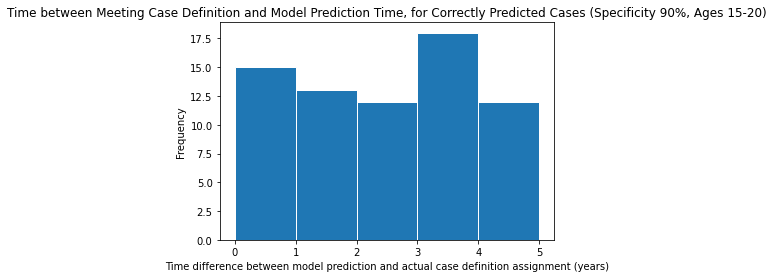

In [21]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_90_15)), int(max(time_difference_btw_model_and_gt_90_15)) + 2)

plt.hist(time_difference_btw_model_and_gt_90_15, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 90%, Ages 15-20)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

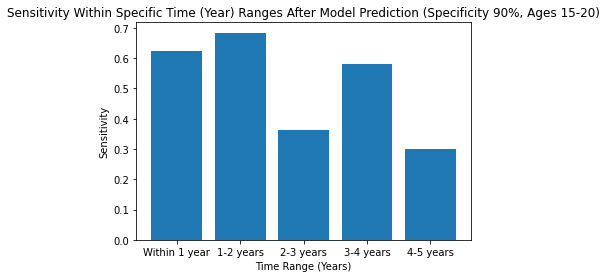

In [22]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_90_15, p_1_to_2_years_90_15, p_2_to_3_years_90_15, p_3_to_4_years_90_15, p_4_to_5_years_90_15])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 90%, Ages 15-20)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 95%)

In [23]:
p_within_1_year_95_15, p_1_to_2_years_95_15, p_2_to_3_years_95_15, p_3_to_4_years_95_15, \
    p_4_to_5_years_95_15, time_difference_btw_model_and_gt_95_15 = \
        get_true_positive_info(15, rf_preds_15, sensitivity_cases_95_15, df_within_1_year_15, \
                                df_1_to_2_years_15, df_2_to_3_years_15, df_3_to_4_years_15, \
                                df_4_to_5_years_15)

Within 1 year (raw):  12
1 to 2 years (raw):  10
2 to 3 years (raw):  7
3 to 4 years (raw):  14
4 to 5 years (raw):  52

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
50.0%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
52.63%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
21.21%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
45.16%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
22.5%


In [24]:
calculate_ci(p_within_1_year_95_15, p_1_to_2_years_95_15, p_2_to_3_years_95_15, p_3_to_4_years_95_15, p_4_to_5_years_95_15, \
             df_within_1_year_15, df_1_to_2_years_15, df_2_to_3_years_15, df_3_to_4_years_15, df_4_to_5_years_15)

[47.96, 52.04]
[50.06, 55.2]
[20.22, 22.2]
[43.6, 46.73]
[21.65, 23.35]


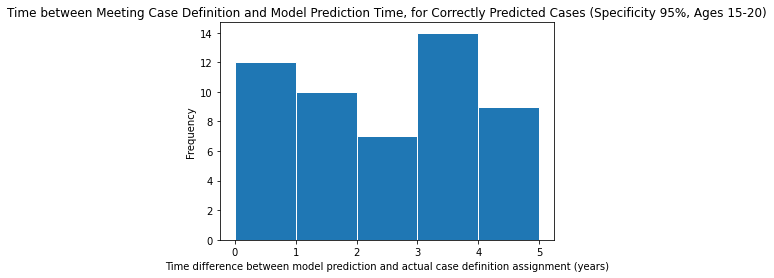

In [25]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_95_15)), int(max(time_difference_btw_model_and_gt_95_15)) + 2)

plt.hist(time_difference_btw_model_and_gt_95_15, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 95%, Ages 15-20)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

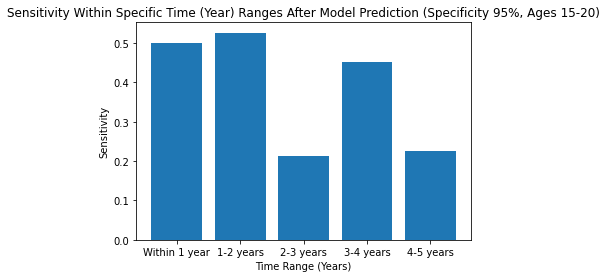

In [26]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_95_15, p_1_to_2_years_95_15, p_2_to_3_years_95_15, p_3_to_4_years_95_15, p_4_to_5_years_95_15])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 95%, Ages 15-20)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 99%)

In [27]:
p_within_1_year_99_15, p_1_to_2_years_99_15, p_2_to_3_years_99_15, p_3_to_4_years_99_15, \
    p_4_to_5_years_99_15, time_difference_btw_model_and_gt_99_15 = \
        get_true_positive_info(15, rf_preds_15, sensitivity_cases_99_15, df_within_1_year_15, \
                                df_1_to_2_years_15, df_2_to_3_years_15, df_3_to_4_years_15, \
                                df_4_to_5_years_15)

Within 1 year (raw):  7
1 to 2 years (raw):  7
2 to 3 years (raw):  4
3 to 4 years (raw):  10
4 to 5 years (raw):  32

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
29.17%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
36.84%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
12.12%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
32.26%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
10.0%


In [28]:
calculate_ci(p_within_1_year_99_15, p_1_to_2_years_99_15, p_2_to_3_years_99_15, p_3_to_4_years_99_15, p_4_to_5_years_99_15, \
             df_within_1_year_15, df_1_to_2_years_15, df_2_to_3_years_15, df_3_to_4_years_15, df_4_to_5_years_15)

[27.48, 30.85]
[34.44, 39.24]
[11.49, 12.75]
[30.88, 33.64]
[9.56, 10.44]


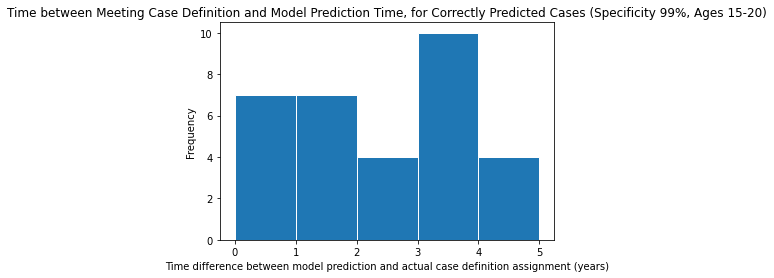

In [29]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_99_15)), int(max(time_difference_btw_model_and_gt_99_15)) + 2)

plt.hist(time_difference_btw_model_and_gt_99_15, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 99%, Ages 15-20)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

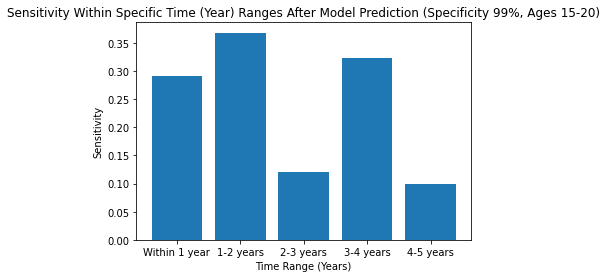

In [30]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_99_15, p_1_to_2_years_99_15, p_2_to_3_years_99_15, p_3_to_4_years_99_15, p_4_to_5_years_99_15])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 99%, Ages 15-20)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

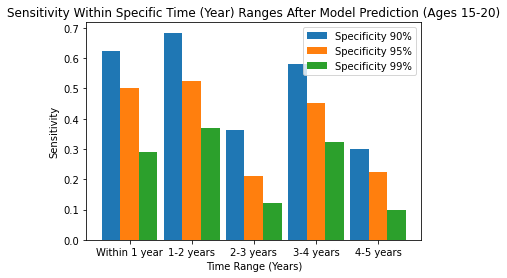

In [31]:
categories = ['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years']

# Specificity 90%
sensitivity_90 = [p_within_1_year_90_15, p_1_to_2_years_90_15, p_2_to_3_years_90_15, p_3_to_4_years_90_15, p_4_to_5_years_90_15]

# Specificity 95%
sensitivity_95 = [p_within_1_year_95_15, p_1_to_2_years_95_15, p_2_to_3_years_95_15, p_3_to_4_years_95_15, p_4_to_5_years_95_15]

# Specificity 99%
sensitivity_99 = [p_within_1_year_99_15, p_1_to_2_years_99_15, p_2_to_3_years_99_15, p_3_to_4_years_99_15, p_4_to_5_years_99_15]

# Combine data for each category
bar_width = 0.3
index = np.arange(len(categories))

plt.bar(index, sensitivity_90, bar_width, label='Specificity 90%')
plt.bar(index + bar_width, sensitivity_95, bar_width, label='Specificity 95%')
plt.bar(index + 2*bar_width, sensitivity_99, bar_width, label='Specificity 99%')

plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Ages 15-20)')
plt.xticks(index + bar_width, categories)
plt.legend()

plt.show()

## Ages 20 - 25

#### Specificity Percentages

In [32]:
# total_cases_df_20, rf_preds_20, rf_cases_20, rf_controls_20, total_cases_20, df_within_1_year_20, df_1_to_2_years_20, df_2_to_3_years_20, \
#     df_3_to_4_years_20, df_4_to_5_years_20 = get_age_bucket_df('rf_model_pred_res_age_20.csv', 20)

In [17]:
total_cases_df_20, rf_preds_20, rf_cases_20, rf_controls_20, total_cases_20, df_within_1_year_20, df_1_to_2_years_20, df_2_to_3_years_20, \
    df_3_to_4_years_20, df_4_to_5_years_20 = get_age_bucket_df('./rf_model_pred_res_age_20.csv', 20)

Within 1 year:  41
1 to 2 years:  60
2 to 3 years:  53
3 to 4 years:  54
4 to 5 years:  35
Total RF testing cases:  243


In [18]:
len(rf_controls_20)

19035

In [19]:
len(rf_cases_20)

471

In [45]:
952+18083

19035

In [46]:
sensitivity_cases_90_20, sensitivity_cases_95_20, \
    sensitivity_cases_99_20 = get_sensitivity(rf_controls_20, total_cases_df_20, total_cases_20)

90% threshold:  0.013671875
95% threshold:  0.0234375
99% threshold:  0.060546875
True positives:  76
False positives:  951
True negatives:  17991
False negatives:  167

Individuals predicted as cases, 95%:  1027
Race breakdown of individuals above:  {'Black': 94, 'Unknown': 91, 'Other': 123, 'White': 683, 'Asian': 36}
Race breakdown of true positives:  {'Black': 10, 'Unknown': 3, 'Other': 7, 'White': 55, 'Asian': 1}

Specificity 90 (104/243):  0.4279835390946502
Specificity 95 (76/243):  0.31275720164609055
Specificity 99 (39/243):  0.16049382716049382


In [47]:
len(sensitivity_cases_90_20)

104

#### Age predictions (Specificity 90%)

In [37]:
p_within_1_year_90_20, p_1_to_2_years_90_20, p_2_to_3_years_90_20, p_3_to_4_years_90_20, \
    p_4_to_5_years_90_20, time_difference_btw_model_and_gt_90_20 = \
        get_true_positive_info(20, rf_preds_20, sensitivity_cases_90_20, df_within_1_year_20, \
                                df_1_to_2_years_20, df_2_to_3_years_20, df_3_to_4_years_20, \
                                df_4_to_5_years_20)

Within 1 year (raw):  27
1 to 2 years (raw):  27
2 to 3 years (raw):  21
3 to 4 years (raw):  18
4 to 5 years (raw):  104

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
65.85%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
45.0%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
39.62%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
33.33%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
31.43%


In [38]:
calculate_ci(p_within_1_year_90_20, p_1_to_2_years_90_20, p_2_to_3_years_90_20, p_3_to_4_years_90_20, p_4_to_5_years_90_20, \
             df_within_1_year_20, df_1_to_2_years_20, df_2_to_3_years_20, df_3_to_4_years_20, df_4_to_5_years_20)

[64.78, 66.93]
[44.19, 45.81]
[38.74, 40.51]
[32.53, 34.14]
[30.22, 32.64]


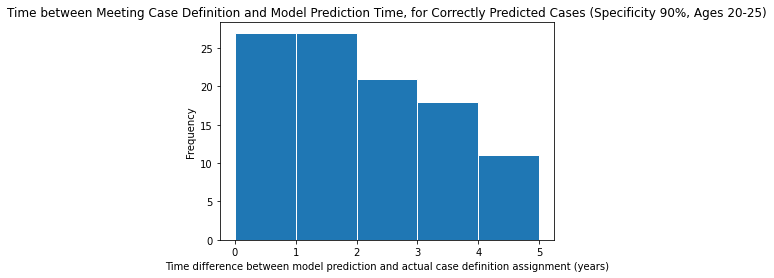

In [39]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_90_20)), int(max(time_difference_btw_model_and_gt_90_20)) + 2)

plt.hist(time_difference_btw_model_and_gt_90_20, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 90%, Ages 20-25)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

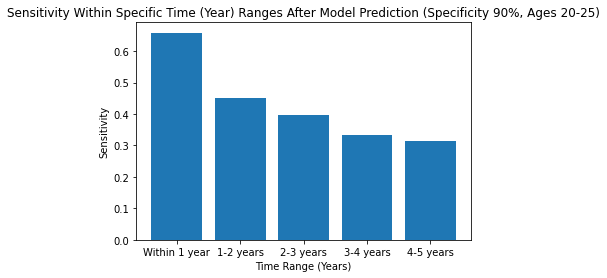

In [40]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_90_20, p_1_to_2_years_90_20, p_2_to_3_years_90_20, p_3_to_4_years_90_20, p_4_to_5_years_90_20])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 90%, Ages 20-25)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 95%)

In [41]:
p_within_1_year_95_20, p_1_to_2_years_95_20, p_2_to_3_years_95_20, p_3_to_4_years_95_20, \
    p_4_to_5_years_95_20, time_difference_btw_model_and_gt_95_20 = \
        get_true_positive_info(20, rf_preds_20, sensitivity_cases_95_20, df_within_1_year_20, \
                                df_1_to_2_years_20, df_2_to_3_years_20, df_3_to_4_years_20, \
                                df_4_to_5_years_20)

Within 1 year (raw):  24
1 to 2 years (raw):  23
2 to 3 years (raw):  15
3 to 4 years (raw):  9
4 to 5 years (raw):  76

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
58.54%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
38.33%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
28.3%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
16.67%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
14.29%


In [42]:
calculate_ci(p_within_1_year_95_20, p_1_to_2_years_95_20, p_2_to_3_years_95_20, p_3_to_4_years_95_20, p_4_to_5_years_95_20, \
             df_within_1_year_20, df_1_to_2_years_20, df_2_to_3_years_20, df_3_to_4_years_20, df_4_to_5_years_20)

[57.38, 59.7]
[37.56, 39.11]
[27.55, 29.05]
[16.16, 17.17]
[13.6, 14.97]


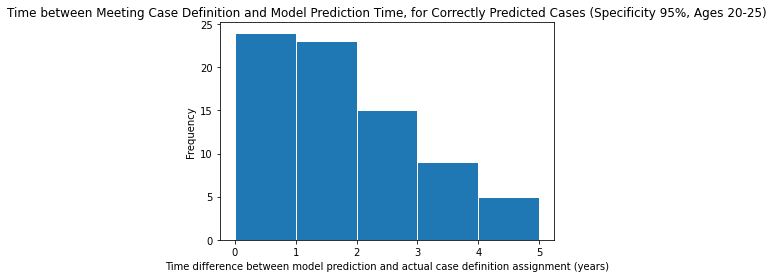

In [43]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_95_20)), int(max(time_difference_btw_model_and_gt_95_20)) + 2)

plt.hist(time_difference_btw_model_and_gt_95_20, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 95%, Ages 20-25)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

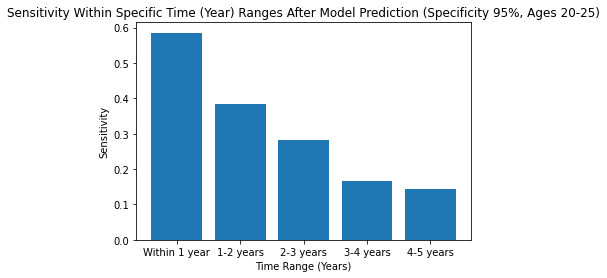

In [44]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_95_20, p_1_to_2_years_95_20, p_2_to_3_years_95_20, p_3_to_4_years_95_20, p_4_to_5_years_95_20])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 95%, Ages 20-25)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

In [45]:
p_within_1_year_95_20

0.5853658536585366

In [46]:
p_1_to_2_years_95_20

0.38333333333333336

In [ ]:
auc_ci()

#### Age predictions (Specificity 99%)

In [47]:
p_within_1_year_99_20, p_1_to_2_years_99_20, p_2_to_3_years_99_20, p_3_to_4_years_99_20, \
    p_4_to_5_years_99_20, time_difference_btw_model_and_gt_99_20 = \
        get_true_positive_info(20, rf_preds_20, sensitivity_cases_99_20, df_within_1_year_20, \
                                df_1_to_2_years_20, df_2_to_3_years_20, df_3_to_4_years_20, \
                                df_4_to_5_years_20)

Within 1 year (raw):  17
1 to 2 years (raw):  12
2 to 3 years (raw):  4
3 to 4 years (raw):  4
4 to 5 years (raw):  39

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
41.46%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
20.0%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
7.55%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
7.41%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
5.71%


In [48]:
calculate_ci(p_within_1_year_99_20, p_1_to_2_years_99_20, p_2_to_3_years_99_20, p_3_to_4_years_99_20, p_4_to_5_years_99_20, \
             df_within_1_year_20, df_1_to_2_years_20, df_2_to_3_years_20, df_3_to_4_years_20, df_4_to_5_years_20)

[40.3, 42.62]
[19.48, 20.52]
[7.29, 7.81]
[7.16, 7.66]
[5.41, 6.02]


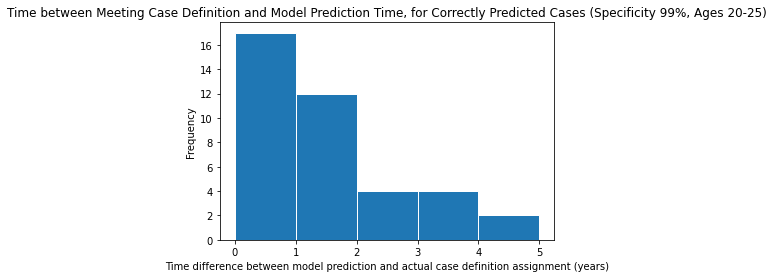

In [49]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_99_20)), int(max(time_difference_btw_model_and_gt_99_20)) + 2)

plt.hist(time_difference_btw_model_and_gt_99_20, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 99%, Ages 20-25)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

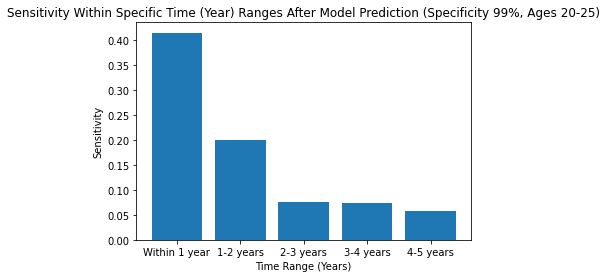

In [50]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_99_20, p_1_to_2_years_99_20, p_2_to_3_years_99_20, p_3_to_4_years_99_20, p_4_to_5_years_99_20])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 99%, Ages 20-25)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

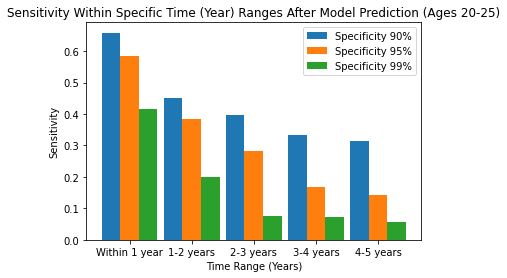

In [51]:
categories = ['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years']

# Specificity 90%
sensitivity_90 = [p_within_1_year_90_20, p_1_to_2_years_90_20, p_2_to_3_years_90_20, p_3_to_4_years_90_20, p_4_to_5_years_90_20]

# Specificity 95%
sensitivity_95 = [p_within_1_year_95_20, p_1_to_2_years_95_20, p_2_to_3_years_95_20, p_3_to_4_years_95_20, p_4_to_5_years_95_20]

# Specificity 99%
sensitivity_99 = [p_within_1_year_99_20, p_1_to_2_years_99_20, p_2_to_3_years_99_20, p_3_to_4_years_99_20, p_4_to_5_years_99_20]

# Combine data for each category
bar_width = 0.3
index = np.arange(len(categories))

plt.bar(index, sensitivity_90, bar_width, label='Specificity 90%')
plt.bar(index + bar_width, sensitivity_95, bar_width, label='Specificity 95%')
plt.bar(index + 2*bar_width, sensitivity_99, bar_width, label='Specificity 99%')

plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Ages 20-25)')
plt.xticks(index + bar_width, categories)
plt.legend()

plt.show()

## Ages 25 - 30

#### Specificity Percentages

In [52]:
# total_cases_df_25, rf_preds_25, rf_cases_25, rf_controls_25, total_cases_25, df_within_1_year_25, df_1_to_2_years_25, df_2_to_3_years_25, \
#     df_3_to_4_years_25, df_4_to_5_years_25 = get_age_bucket_df('rf_model_pred_res_age_25.csv', 25)

In [20]:
total_cases_df_25, rf_preds_25, rf_cases_25, rf_controls_25, total_cases_25, df_within_1_year_25, df_1_to_2_years_25, df_2_to_3_years_25, \
    df_3_to_4_years_25, df_4_to_5_years_25 = get_age_bucket_df('./rf_model_pred_res_age_25.csv', 25)

Within 1 year:  51
1 to 2 years:  52
2 to 3 years:  55
3 to 4 years:  57
4 to 5 years:  48
Total RF testing cases:  263


In [21]:
len(rf_cases_25)

416

In [49]:
# total_cases_25 / len(rf_preds_30)

In [50]:
# TODO: check with Yuval to confirm these numbers --> close but not quite matching table 2 sensitivities
sensitivity_cases_90_25, sensitivity_cases_95_25, \
    sensitivity_cases_99_25 = get_sensitivity(rf_controls_25, total_cases_df_25, total_cases_25)

90% threshold:  0.01171875
95% threshold:  0.021484375
99% threshold:  0.064453125
True positives:  99
False positives:  1311
True negatives:  24841
False negatives:  164

Individuals predicted as cases, 95%:  1410
Race breakdown of individuals above:  {'Black': 150, 'Unknown': 107, 'Other': 137, 'White': 980, 'Asian': 36}
Race breakdown of true positives:  {'Black': 15, 'Unknown': 8, 'Other': 8, 'White': 64, 'Asian': 4}

Specificity 90 (129/263):  0.49049429657794674
Specificity 95 (99/263):  0.376425855513308
Specificity 99 (43/263):  0.1634980988593156


In [51]:
len(sensitivity_cases_90_25)

129

#### Age predictions (Specificity 90%)

In [56]:
p_within_1_year_90_25, p_1_to_2_years_90_25, p_2_to_3_years_90_25, p_3_to_4_years_90_25, \
    p_4_to_5_years_90_25, time_difference_btw_model_and_gt_90_25 = \
        get_true_positive_info(25, rf_preds_25, sensitivity_cases_90_25, df_within_1_year_25, \
                                df_1_to_2_years_25, df_2_to_3_years_25, df_3_to_4_years_25, \
                                df_4_to_5_years_25)

Within 1 year (raw):  36
1 to 2 years (raw):  27
2 to 3 years (raw):  23
3 to 4 years (raw):  21
4 to 5 years (raw):  129

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
70.59%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
51.92%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
41.82%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
36.84%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
45.83%


In [57]:
calculate_ci(p_within_1_year_90_25, p_1_to_2_years_90_25, p_2_to_3_years_90_25, p_3_to_4_years_90_25, p_4_to_5_years_90_25, \
             df_within_1_year_25, df_1_to_2_years_25, df_2_to_3_years_25, df_3_to_4_years_25, df_4_to_5_years_25)

[69.79, 71.39]
[50.98, 52.86]
[40.95, 42.69]
[36.04, 37.64]
[44.82, 46.85]


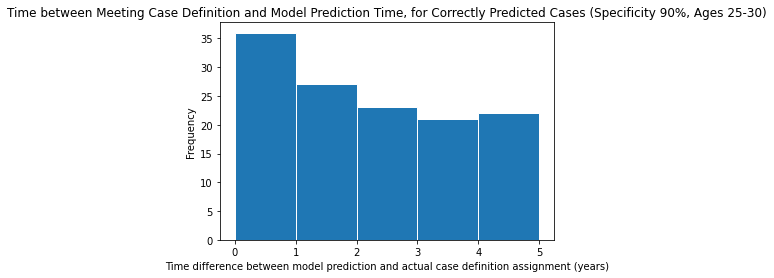

In [58]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_90_25)), int(max(time_difference_btw_model_and_gt_90_25)) + 2)

plt.hist(time_difference_btw_model_and_gt_90_25, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 90%, Ages 25-30)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

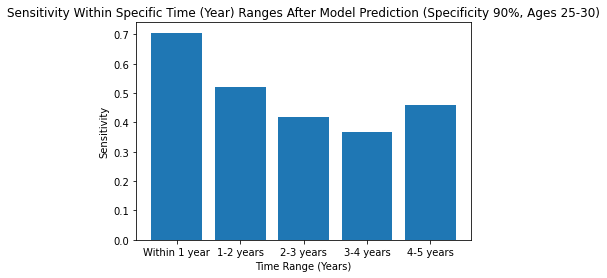

In [59]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_90_25, p_1_to_2_years_90_25, p_2_to_3_years_90_25, p_3_to_4_years_90_25, p_4_to_5_years_90_25])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 90%, Ages 25-30)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 95%)

In [60]:
p_within_1_year_95_25, p_1_to_2_years_95_25, p_2_to_3_years_95_25, p_3_to_4_years_95_25, \
    p_4_to_5_years_95_25, time_difference_btw_model_and_gt_95_25 = \
        get_true_positive_info(25, rf_preds_25, sensitivity_cases_95_25, df_within_1_year_25, \
                                df_1_to_2_years_25, df_2_to_3_years_25, df_3_to_4_years_25, \
                                df_4_to_5_years_25)

Within 1 year (raw):  31
1 to 2 years (raw):  19
2 to 3 years (raw):  19
3 to 4 years (raw):  14
4 to 5 years (raw):  99

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
60.78%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
36.54%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
34.55%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
24.56%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
33.33%


In [61]:
calculate_ci(p_within_1_year_95_25, p_1_to_2_years_95_25, p_2_to_3_years_95_25, p_3_to_4_years_95_25, p_4_to_5_years_95_25, \
             df_within_1_year_25, df_1_to_2_years_25, df_2_to_3_years_25, df_3_to_4_years_25, df_4_to_5_years_25)

[59.87, 61.7]
[35.66, 37.41]
[33.74, 35.35]
[23.92, 25.2]
[32.43, 34.24]


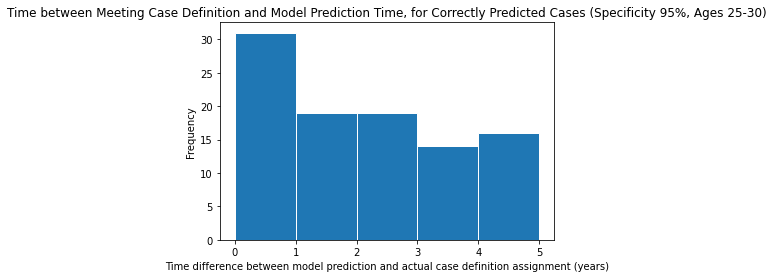

In [62]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_95_25)), int(max(time_difference_btw_model_and_gt_95_25)) + 2)

plt.hist(time_difference_btw_model_and_gt_95_25, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 95%, Ages 25-30)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

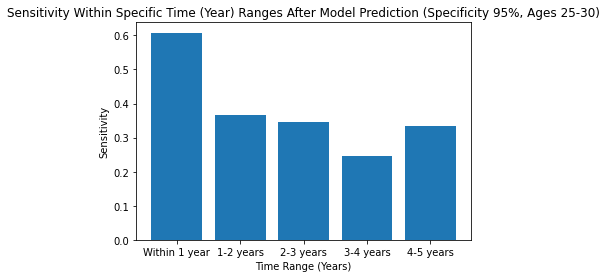

In [63]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_95_25, p_1_to_2_years_95_25, p_2_to_3_years_95_25, p_3_to_4_years_95_25, p_4_to_5_years_95_25])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 95%, Ages 25-30)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 99%)

In [64]:
p_within_1_year_99_25, p_1_to_2_years_99_25, p_2_to_3_years_99_25, p_3_to_4_years_99_25, \
    p_4_to_5_years_99_25, time_difference_btw_model_and_gt_99_25 = \
        get_true_positive_info(25, rf_preds_25, sensitivity_cases_99_25, df_within_1_year_25, \
                                df_1_to_2_years_25, df_2_to_3_years_25, df_3_to_4_years_25, \
                                df_4_to_5_years_25)

Within 1 year (raw):  14
1 to 2 years (raw):  10
2 to 3 years (raw):  9
3 to 4 years (raw):  4
4 to 5 years (raw):  43

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
27.45%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
19.23%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
16.36%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
7.02%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
12.5%


In [65]:
calculate_ci(p_within_1_year_99_25, p_1_to_2_years_99_25, p_2_to_3_years_99_25, p_3_to_4_years_99_25, p_4_to_5_years_99_25, \
             df_within_1_year_25, df_1_to_2_years_25, df_2_to_3_years_25, df_3_to_4_years_25, df_4_to_5_years_25)

[26.69, 28.22]
[18.65, 19.82]
[15.88, 16.85]
[6.79, 7.24]
[12.05, 12.95]


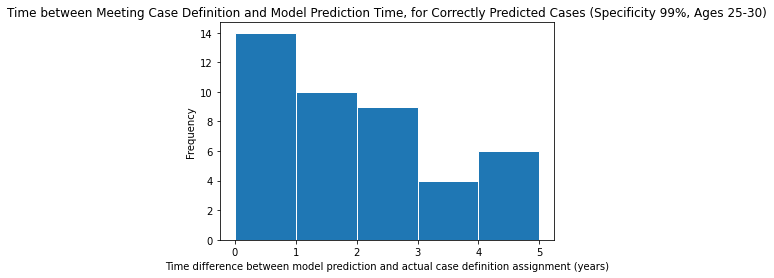

In [66]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_99_25)), int(max(time_difference_btw_model_and_gt_99_25)) + 2)

plt.hist(time_difference_btw_model_and_gt_99_25, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 99%, Ages 25-30)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

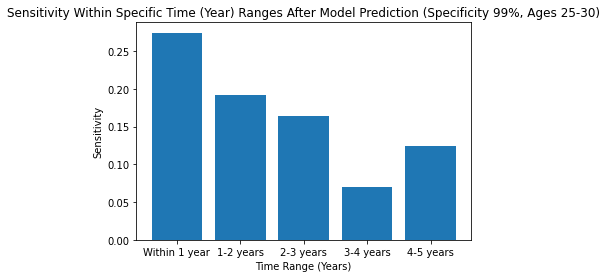

In [67]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_99_25, p_1_to_2_years_99_25, p_2_to_3_years_99_25, p_3_to_4_years_99_25, p_4_to_5_years_99_25])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 99%, Ages 25-30)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

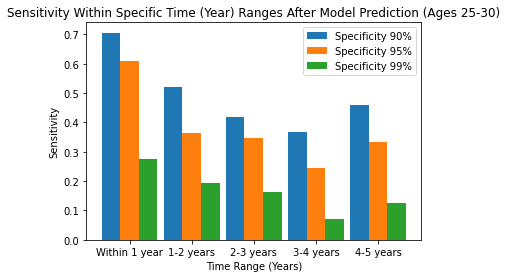

In [68]:
categories = ['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years']

# Specificity 90%
sensitivity_90 = [p_within_1_year_90_25, p_1_to_2_years_90_25, p_2_to_3_years_90_25, p_3_to_4_years_90_25, p_4_to_5_years_90_25]

# Specificity 95%
sensitivity_95 = [p_within_1_year_95_25, p_1_to_2_years_95_25, p_2_to_3_years_95_25, p_3_to_4_years_95_25, p_4_to_5_years_95_25]

# Specificity 99%
sensitivity_99 = [p_within_1_year_99_25, p_1_to_2_years_99_25, p_2_to_3_years_99_25, p_3_to_4_years_99_25, p_4_to_5_years_99_25]

# Combine data for each category
bar_width = 0.3
index = np.arange(len(categories))

plt.bar(index, sensitivity_90, bar_width, label='Specificity 90%')
plt.bar(index + bar_width, sensitivity_95, bar_width, label='Specificity 95%')
plt.bar(index + 2*bar_width, sensitivity_99, bar_width, label='Specificity 99%')

plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Ages 25-30)')
plt.xticks(index + bar_width, categories)
plt.legend()

plt.show()

## Ages 30 - 35

#### Specificity Percentages

In [69]:
# total_cases_df_30, rf_preds_30, rf_cases_30, rf_controls_30, total_cases_30, df_within_1_year_30, df_1_to_2_years_30, df_2_to_3_years_30, \
#     df_3_to_4_years_30, df_4_to_5_years_30 = get_age_bucket_df('rf_model_pred_res_age_30.csv', 30)

In [22]:
total_cases_df_30, rf_preds_30, rf_cases_30, rf_controls_30, total_cases_30, df_within_1_year_30, df_1_to_2_years_30, df_2_to_3_years_30, \
    df_3_to_4_years_30, df_4_to_5_years_30 = get_age_bucket_df('./rf_model_pred_res_age_30.csv', 30)

Within 1 year:  49
1 to 2 years:  76
2 to 3 years:  51
3 to 4 years:  53
4 to 5 years:  42
Total RF testing cases:  271


In [23]:
total_cases_30 / len(rf_preds_30)

0.008629199172106352

In [24]:
len(rf_cases_30)

273

In [54]:
sensitivity_cases_90_30, sensitivity_cases_95_30, \
    sensitivity_cases_99_30 = get_sensitivity(rf_controls_30, total_cases_df_30, total_cases_30)

90% threshold:  0.009765625
95% threshold:  0.01953125
99% threshold:  0.064453125
True positives:  124
False positives:  1556
True negatives:  29425
False negatives:  147

Individuals predicted as cases, 95%:  1680
Race breakdown of individuals above:  {'Black': 196, 'Unknown': 126, 'Other': 184, 'White': 1137, 'Asian': 37}
Race breakdown of true positives:  {'Black': 17, 'Unknown': 5, 'Other': 10, 'White': 90, 'Asian': 2}

Specificity 90 (156/271):  0.5756457564575646
Specificity 95 (124/271):  0.4575645756457565
Specificity 99 (60/271):  0.22140221402214022


In [55]:
len(sensitivity_cases_90_30)

156

#### Age predictions (Specificity 90%)

In [73]:
p_within_1_year_90_30, p_1_to_2_years_90_30, p_2_to_3_years_90_30, p_3_to_4_years_90_30, \
    p_4_to_5_years_90_30, time_difference_btw_model_and_gt_90_30 = \
        get_true_positive_info(30, rf_preds_30, sensitivity_cases_90_30, df_within_1_year_30, \
                                df_1_to_2_years_30, df_2_to_3_years_30, df_3_to_4_years_30, \
                                df_4_to_5_years_30)

Within 1 year (raw):  33
1 to 2 years (raw):  47
2 to 3 years (raw):  27
3 to 4 years (raw):  27
4 to 5 years (raw):  156

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
67.35%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
61.84%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
52.94%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
50.94%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
52.38%


In [74]:
calculate_ci(p_within_1_year_90_30, p_1_to_2_years_90_30, p_2_to_3_years_90_30, p_3_to_4_years_90_30, p_4_to_5_years_90_30, \
             df_within_1_year_30, df_1_to_2_years_30, df_2_to_3_years_30, df_3_to_4_years_30, df_4_to_5_years_30)

[66.47, 68.23]
[61.23, 62.45]
[51.98, 53.9]
[50.02, 51.87]
[51.22, 53.54]


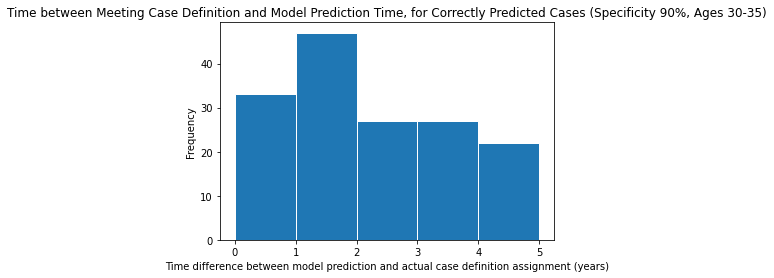

In [75]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_90_30)), int(max(time_difference_btw_model_and_gt_90_30)) + 2)

plt.hist(time_difference_btw_model_and_gt_90_30, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 90%, Ages 30-35)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

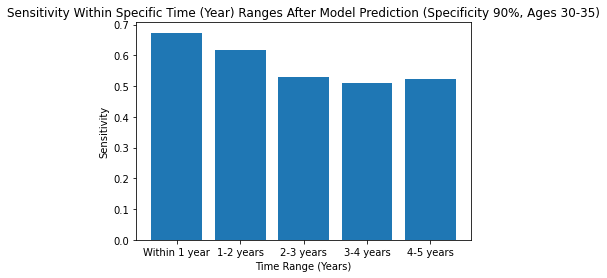

In [76]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_90_30, p_1_to_2_years_90_30, p_2_to_3_years_90_30, p_3_to_4_years_90_30, p_4_to_5_years_90_30])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 90%, Ages 30-35)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 95%)

In [77]:
p_within_1_year_95_30, p_1_to_2_years_95_30, p_2_to_3_years_95_30, p_3_to_4_years_95_30, \
    p_4_to_5_years_95_30, time_difference_btw_model_and_gt_95_30 = \
        get_true_positive_info(30, rf_preds_30, sensitivity_cases_95_30, df_within_1_year_30, \
                                df_1_to_2_years_30, df_2_to_3_years_30, df_3_to_4_years_30, \
                                df_4_to_5_years_30)

Within 1 year (raw):  26
1 to 2 years (raw):  37
2 to 3 years (raw):  21
3 to 4 years (raw):  20
4 to 5 years (raw):  124

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
53.06%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
48.68%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
41.18%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
37.74%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
47.62%


In [78]:
calculate_ci(p_within_1_year_95_30, p_1_to_2_years_95_30, p_2_to_3_years_95_30, p_3_to_4_years_95_30, p_4_to_5_years_95_30, \
             df_within_1_year_30, df_1_to_2_years_30, df_2_to_3_years_30, df_3_to_4_years_30, df_4_to_5_years_30)

[52.06, 54.06]
[48.04, 49.33]
[40.25, 42.11]
[36.87, 38.6]
[46.46, 48.78]


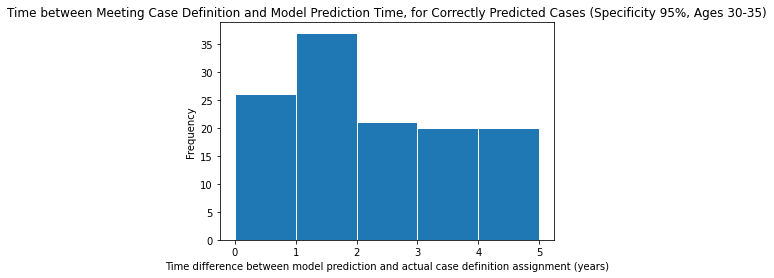

In [79]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_95_30)), int(max(time_difference_btw_model_and_gt_95_30)) + 2)

plt.hist(time_difference_btw_model_and_gt_95_30, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 95%, Ages 30-35)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

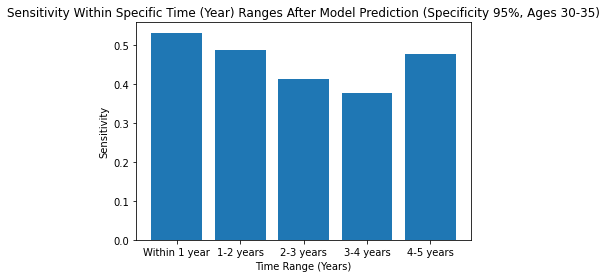

In [80]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_95_30, p_1_to_2_years_95_30, p_2_to_3_years_95_30, p_3_to_4_years_95_30, p_4_to_5_years_95_30])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 95%, Ages 30-35)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

#### Age predictions (Specificity 99%)

In [81]:
p_within_1_year_99_30, p_1_to_2_years_99_30, p_2_to_3_years_99_30, p_3_to_4_years_99_30, \
    p_4_to_5_years_99_30, time_difference_btw_model_and_gt_99_30 = \
        get_true_positive_info(30, rf_preds_30, sensitivity_cases_99_30, df_within_1_year_30, \
                                df_1_to_2_years_30, df_2_to_3_years_30, df_3_to_4_years_30, \
                                df_4_to_5_years_30)

Within 1 year (raw):  14
1 to 2 years (raw):  21
2 to 3 years (raw):  8
3 to 4 years (raw):  9
4 to 5 years (raw):  60

For all people who ground truth got their cases assigned within 1 year, what percent did model predict at age 15?
28.57%
For all people who ground truth got their cases assigned between 1-2 years, what percent did model predict at age 15?
27.63%
For all people who ground truth got their cases assigned between 2-3 years, what percent did model predict at age 15?
15.69%
For all people who ground truth got their cases assigned between 3-4 years, what percent did model predict at age 15?
16.98%
For all people who ground truth got their cases assigned between 4-5 years, what percent did model predict at age 15?
19.05%


In [82]:
calculate_ci(p_within_1_year_99_30, p_1_to_2_years_99_30, p_2_to_3_years_99_30, p_3_to_4_years_99_30, p_4_to_5_years_99_30, \
             df_within_1_year_30, df_1_to_2_years_30, df_2_to_3_years_30, df_3_to_4_years_30, df_4_to_5_years_30)

[27.76, 29.39]
[27.12, 28.15]
[15.18, 16.19]
[16.46, 17.5]
[18.33, 19.77]


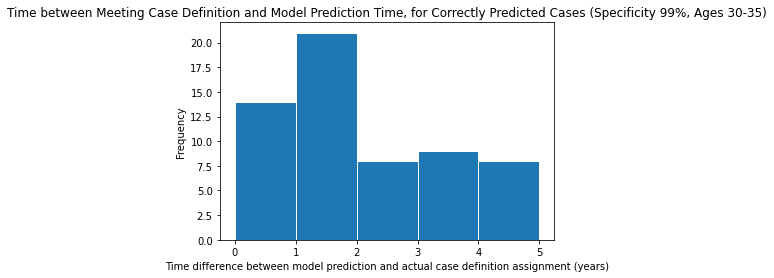

In [83]:
# for all true positives (ground truth cases) AND that the model correctly predicted were cases, plot histogram of time between model's prediction time and the ground truth prediction time
bins = range(int(min(time_difference_btw_model_and_gt_99_30)), int(max(time_difference_btw_model_and_gt_99_30)) + 2)

plt.hist(time_difference_btw_model_and_gt_99_30, bins=bins, ec='white')
plt.title('Time between Meeting Case Definition and Model Prediction Time, for Correctly Predicted Cases (Specificity 99%, Ages 30-35)')
plt.xlabel('Time difference between model prediction and actual case definition assignment (years)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Sensitivity')

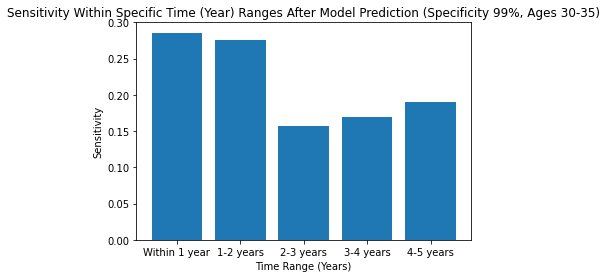

In [84]:
plt.bar(['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years'], \
        [p_within_1_year_99_30, p_1_to_2_years_99_30, p_2_to_3_years_99_30, p_3_to_4_years_99_30, p_4_to_5_years_99_30])
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Specificity 99%, Ages 30-35)')
plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')

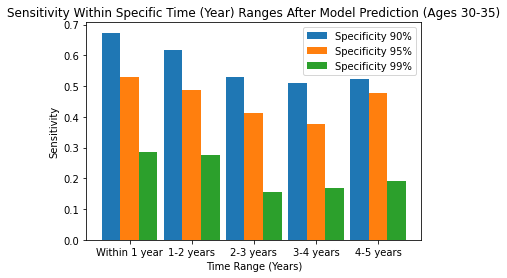

In [85]:
categories = ['Within 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years']

# Specificity 90%
sensitivity_90 = [p_within_1_year_90_30, p_1_to_2_years_90_30, p_2_to_3_years_90_30, p_3_to_4_years_90_30, p_4_to_5_years_90_30]

# Specificity 95%
sensitivity_95 = [p_within_1_year_95_30, p_1_to_2_years_95_30, p_2_to_3_years_95_30, p_3_to_4_years_95_30, p_4_to_5_years_95_30]

# Specificity 99%
sensitivity_99 = [p_within_1_year_99_30, p_1_to_2_years_99_30, p_2_to_3_years_99_30, p_3_to_4_years_99_30, p_4_to_5_years_99_30]

# Combine data for each category
bar_width = 0.3
index = np.arange(len(categories))

plt.bar(index, sensitivity_90, bar_width, label='Specificity 90%')
plt.bar(index + bar_width, sensitivity_95, bar_width, label='Specificity 95%')
plt.bar(index + 2*bar_width, sensitivity_99, bar_width, label='Specificity 99%')

plt.xlabel('Time Range (Years)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Within Specific Time (Year) Ranges After Model Prediction (Ages 30-35)')
plt.xticks(index + bar_width, categories)
plt.legend()

plt.show()